train R2=0.96
test R2=0.94
RMSE(train)2.5
RMSE(test)3.4


Text(0, 0.5, 'Predicted E by XGB(GPa)')

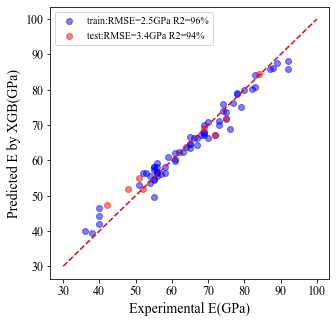

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
with open('TMNZS.csv',mode='r',encoding='UTF-8') as f:
    names=['Ti','Mo','Nb','Zr','Sn','E,GPa']
    df=read_csv(f,names=names)
df
y=df['E,GPa'].values
excluded=['E,GPa']
X=df.drop(excluded,axis=1)
X=X.values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)
import xgboost as xgb
xgb_model = xgb.XGBRegressor(max_depth=4,
                             learning_rate=0.07,
                             n_estimators=100,
                             objective='reg:squarederror',
                             booster='gbtree',
                             random_state=0)
from sklearn.metrics import mean_squared_error
xgb_model.fit(X,y)
y_pred_train_xgb=xgb_model.predict(X_train)
y_pred_test_xgb=xgb_model.predict(X_test)
print('train R2='+str(round(xgb_model.score(X_train,y_train),2)))
print('test R2='+str(round(xgb_model.score(X_test,y_test),2)))
rmse_tr_xgb=mean_squared_error(y_train,y_pred_train_xgb,squared=False)
rmse_te_xgb=mean_squared_error(y_test,y_pred_test_xgb,squared=False)
print('RMSE(train)%.1f'%rmse_tr_xgb)
print('RMSE(test)%.1f'%rmse_te_xgb)
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
plt.figure(figsize=(5,5))
plt.plot([30,100],[30,100],'r--')
plt.scatter(y_train,y_pred_train_xgb,alpha=0.5,color='blue',label='train:RMSE=2.5GPa R2=96%')
plt.scatter(y_test,y_pred_test_xgb,alpha=0.5,color='red',label='test:RMSE=3.4GPa R2=94%')
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Experimental E(GPa)',family='Times New Roman',fontsize=14)
plt.ylabel('Predicted E by XGB(GPa)',family='Times New Roman',fontsize=14)

train R2=0.92
test R2=0.86
RMSE(train)3.5
RMSE(test)5.3


Text(0, 0.5, 'Predicted E by GBDT(GPa)')

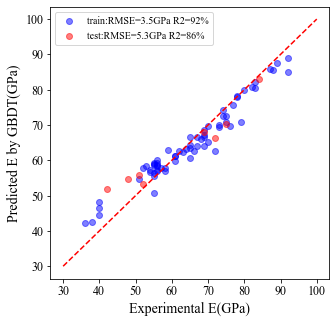

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(max_depth=4,
                             learning_rate=0.032,
                             n_estimators=100,
                             random_state=0)
gbr.fit(X,y)
y_pred_train_gbr=gbr.predict(X_train)
y_pred_test_gbr=gbr.predict(X_test)
print('train R2='+str(round(gbr.score(X_train,y_train),2)))
print('test R2='+str(round(gbr.score(X_test,y_test),2)))
rmse_tr_gbr=mean_squared_error(y_train,y_pred_train_gbr,squared=False)
rmse_te_gbr=mean_squared_error(y_test,y_pred_test_gbr,squared=False)
print('RMSE(train)%.1f'%rmse_tr_gbr)
print('RMSE(test)%.1f'%rmse_te_gbr)
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
plt.figure(figsize=(5,5))
plt.plot([30,100],[30,100],'r--')
plt.scatter(y_train,y_pred_train_gbr,alpha=0.5,color='blue',label='train:RMSE=3.5GPa R2=92%')
plt.scatter(y_test,y_pred_test_gbr,alpha=0.5,color='red',label='test:RMSE=5.3GPa R2=86%')
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Experimental E(GPa)',family='Times New Roman',fontsize=14)
plt.ylabel('Predicted E by GBDT(GPa)',family='Times New Roman',fontsize=14)

train R2=0.89
test R2=0.84
RMSE(train)4.2
RMSE(test)5.7


Text(0, 0.5, 'Predicted E by RF(GPa)')

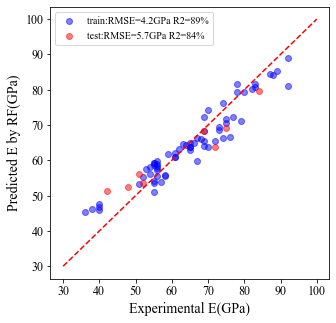

In [3]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=7,random_state=0)
rf.fit(X,y)
y_pred_train_rf=rf.predict(X_train)
y_pred_test_rf=rf.predict(X_test)
print('train R2='+str(round(rf.score(X_train,y_train),2)))
print('test R2='+str(round(rf.score(X_test,y_test),2)))
rmse_tr_rf=mean_squared_error(y_train,y_pred_train_rf,squared=False)
rmse_te_rf=mean_squared_error(y_test,y_pred_test_rf,squared=False)
print('RMSE(train)%.1f'%rmse_tr_rf)
print('RMSE(test)%.1f'%rmse_te_rf)
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
plt.figure(figsize=(5,5))
plt.plot([30,100],[30,100],'r--')
plt.scatter(y_train,y_pred_train_rf,alpha=0.5,color='blue',label='train:RMSE=4.2GPa R2=89%')
plt.scatter(y_test,y_pred_test_rf,alpha=0.5,color='red',label='test:RMSE=5.7GPa R2=84%')
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Experimental E(GPa)',family='Times New Roman',fontsize=14)
plt.ylabel('Predicted E by RF(GPa)',family='Times New Roman',fontsize=14)